In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder
from scipy.stats import chi2_contingency


# Carga el dataset
df_agregado = pd.read_excel("base_matricula_datosabiertos.xlsx", engine='openpyxl')
df_agregado

,AÑO,CODIGO_IES,CODIGO_CARRERA,TIPO_SEDE,PROVINCIA_SEDE,CANTON_SEDE,SEXO,ETNIA,PUEBLOS_NACIONALIDAD,DISCAPACIDAD,...,CANTON_RESIDENCIA,NOMBRE_IES,TIPO_FINANCIAMIENTO,NOMBRE_CARRERA,CAMPO_AMPLIO,CAMPO_ESPECIFICO,CAMPO_DETALLADO,NIVEL_FORMACIÓN,MODALIDAD,tot
0,2020,1001,00002,MATRIZ,PICHINCHA,QUITO,HOMBRE,MESTIZO,NO_APLICA,FISICA_MOTORA,...,QUITO,ESCUELA POLITECNICA NACIONAL,PUBLICA,INGENIERIA AGROINDUSTRIAL,"AGRICULTURA, SILVICULTURA, PESCA Y VETERINARIA","AGRICULTURA, SILVICULTURA Y PESCA",SIN REGISTRO,TERCER NIVEL O PREGRADO,PRESENCIAL,1
1,2020,1001,00002,MATRIZ,PICHINCHA,QUITO,HOMBRE,MESTIZO,NO_APLICA,NINGUNA,...,QUITO,ESCUELA POLITECNICA NACIONAL,PUBLICA,INGENIERIA AGROINDUSTRIAL,"AGRICULTURA, SILVICULTURA, PESCA Y VETERINARIA","AGRICULTURA, SILVICULTURA Y PESCA",SIN REGISTRO,TERCER NIVEL O PREGRADO,PRESENCIAL,15
2,2020,1001,00002,MATRIZ,PICHINCHA,QUITO,HOMBRE,MESTIZO,NO_APLICA,NINGUNA,...,NO_REGISTRA,ESCUELA POLITECNICA NACIONAL,PUBLICA,INGENIERIA AGROINDUSTRIAL,"AGRICULTURA, SILVICULTURA, PESCA Y VETERINARIA","AGRICULTURA, SILVICULTURA Y PESCA",SIN REGISTRO,TERCER NIVEL O PREGRADO,PRESENCIAL,1
3,2020,1001,00002,MATRIZ,PICHINCHA,QUITO,HOMBRE,NO_REGISTRA,NO_APLICA,NINGUNA,...,QUITO,ESCUELA POLITECNICA NACIONAL,PUBLICA,INGENIERIA AGROINDUSTRIAL,"AGRICULTURA, SILVICULTURA, PESCA Y VETERINARIA","AGRICULTURA, SILVICULTURA Y PESCA",SIN REGISTRO,TERCER NIVEL O PREGRADO,PRESENCIAL,1
4,2020,1001,00002,MATRIZ,PICHINCHA,QUITO,MUJER,MESTIZO,NO_APLICA,NINGUNA,...,QUITO,ESCUELA POLITECNICA NACIONAL,PUBLICA,INGENIERIA AGROINDUSTRIAL,"AGRICULTURA, SILVICULTURA, PESCA Y VETERINARIA","AGRICULTURA, SILVICULTURA Y PESCA",SIN REGISTRO,TERCER NIVEL O PREGRADO,PRESENCIAL,37
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
399171,2022,3027,750114K01A-H-0907,MATRIZ,GUAYAS,DURAN,MUJER,MESTIZO,NO_APLICA,NINGUNA,...,CHONE,UNIVERSIDAD BOLIVARIANA DEL ECUADOR,PARTICULAR AUTOFINANCIADA,PEDAGOGIA DE LA CULTURA FISICA,EDUCACION,EDUCACION,FORMACION PARA DOCENTES CON ASIGNATURAS DE ESP...,CUARTO NIVEL O POSGRADO,HIBRIDA,1
399172,2022,3027,750114K01A-H-0907,MATRIZ,GUAYAS,DURAN,MUJER,MESTIZO,NO_APLICA,NINGUNA,...,LA JOYA DE LOS SACHAS,UNIVERSIDAD BOLIVARIANA DEL ECUADOR,PARTICULAR AUTOFINANCIADA,PEDAGOGIA DE LA CULTURA FISICA,EDUCACION,EDUCACION,FORMACION PARA DOCENTES CON ASIGNATURAS DE ESP...,CUARTO NIVEL O POSGRADO,HIBRIDA,1
399173,2022,3027,750114K01A-H-0907,MATRIZ,GUAYAS,DURAN,MUJER,MESTIZO,NO_APLICA,NINGUNA,...,PASTAZA,UNIVERSIDAD BOLIVARIANA DEL ECUADOR,PARTICULAR AUTOFINANCIADA,PEDAGOGIA DE LA CULTURA FISICA,EDUCACION,EDUCACION,FORMACION PARA DOCENTES CON ASIGNATURAS DE ESP...,CUARTO NIVEL O POSGRADO,HIBRIDA,3
399174,2022,3027,750114K01A-H-0907,MATRIZ,GUAYAS,DURAN,MUJER,MESTIZO,NO_APLICA,NINGUNA,...,QUITO,UNIVERSIDAD BOLIVARIANA DEL ECUADOR,PARTICULAR AUTOFINANCIADA,PEDAGOGIA DE LA CULTURA FISICA,EDUCACION,EDUCACION,FORMACION PARA DOCENTES CON ASIGNATURAS DE ESP...,CUARTO NIVEL O POSGRADO,HIBRIDA,5


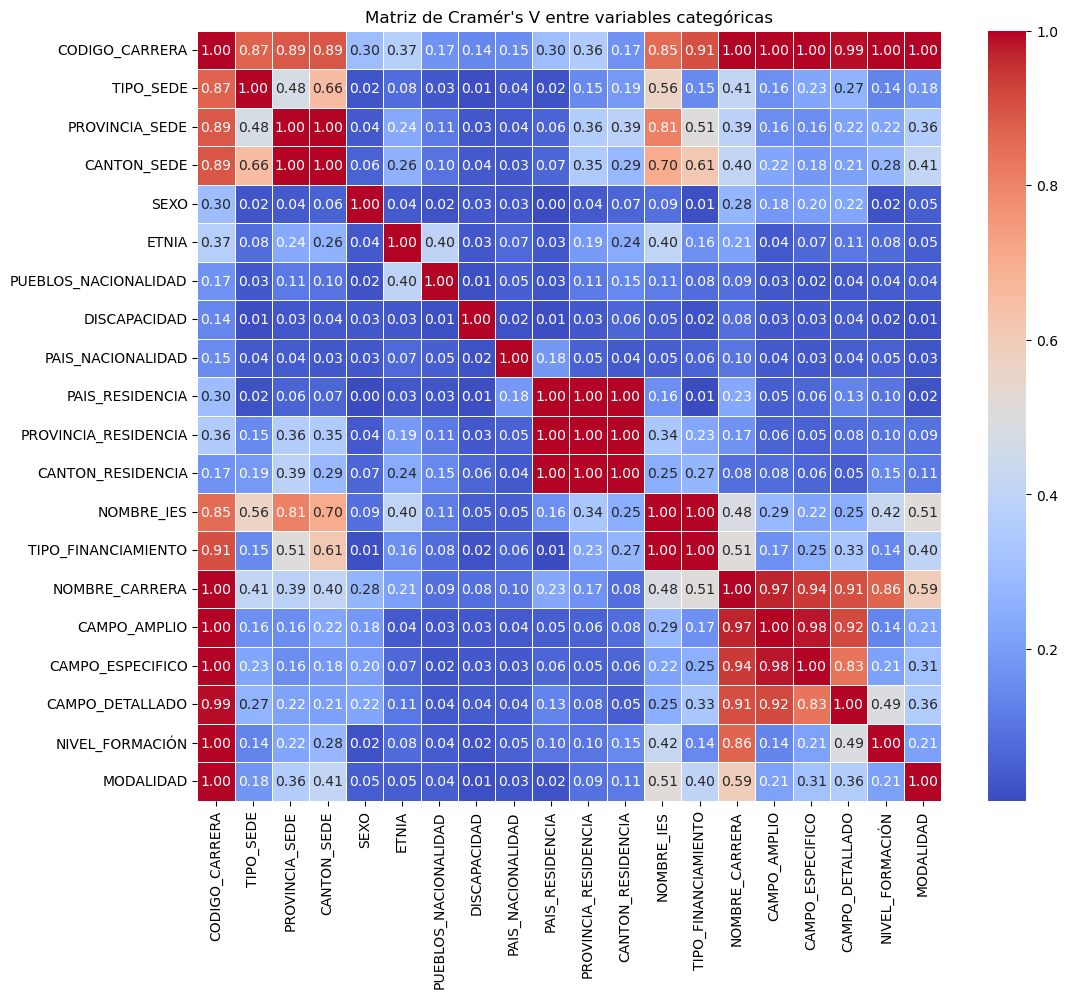

In [7]:
##Aplicación de correlación de Cramers para determinar variables a excluir

import pandas as pd
import numpy as np
from scipy.stats import chi2_contingency

# Función para calcular Cramér's V
def cramers_v(x, y):
    confusion_matrix = pd.crosstab(x, y)
    chi2 = chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    r, k = confusion_matrix.shape
    return np.sqrt(chi2 / (n * (min(k, r) - 1)))

# Crear una lista de las columnas categóricas que deseas analizar
categorical_columns = df_agregado.select_dtypes(include=['object']).columns

# Crear una matriz vacía para almacenar los valores de Cramér's V
cramers_v_matrix = pd.DataFrame(np.zeros((len(categorical_columns), len(categorical_columns))),
                                index=categorical_columns, columns=categorical_columns)

# Rellenar la matriz con los valores de Cramér's V
for col1 in categorical_columns:
    for col2 in categorical_columns:
        cramers_v_matrix.loc[col1, col2] = cramers_v(df_agregado[col1], df_agregado[col2])

# Visualizar la matriz de Cramér's V
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 10))
sns.heatmap(cramers_v_matrix, annot=True, fmt=".2f", cmap='coolwarm', linewidths=0.5)
plt.title("Matriz de Cramér's V entre variables categóricas")
plt.show()


C:\Users\luis.baca\AppData\Local\Temp\ipykernel_7952\978704842.py:30: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
C:\Users\luis.baca\AppData\Local\Temp\ipykernel_7952\978704842.py:30: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
C:\Users\luis.baca\AppData\Local\Temp\ipykernel_7952\978704842.py:30: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
C:\Users\luis.baca\AppData\Local\Temp\ipykernel_7952\978704842.py:30: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
C:\Users\luis.baca\AppData\Local\Temp\ipykernel_7952\978704842.py:30: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
C:\Users\luis.baca\AppData\Local\Temp\ipykernel_7952\978704842.py:30: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
C:\Users\luis.baca\AppData\Local\Temp\ipykernel_7952\978704842.py:30: UserWarning: The figure layout has changed to tight
  plt.tight_layout()

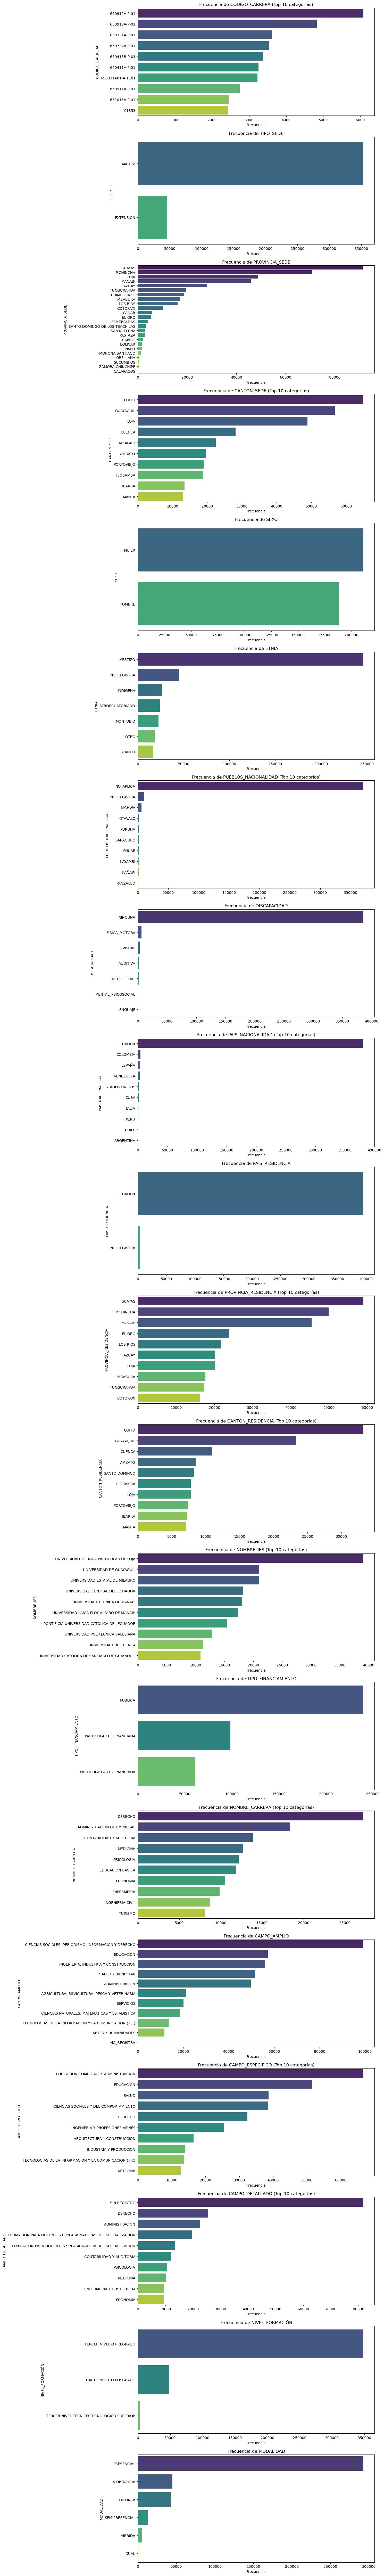


Top 10 categorías de CODIGO_CARRERA:
CODIGO_CARRERA
650912A-P-01        6080
650913A-P-01        4825
650331A-P-01        3622
650732A-P-01        3531
650413B-P-01        3372
650411A-P-01        3252
650331A01-A-1101    3225
650911A-P-01        2748
651015A-P-01        2448
01853               2428
Name: count, dtype: int64

Frecuencias de TIPO_SEDE:
TIPO_SEDE
MATRIZ       353081
EXTENSION     46095
Name: count, dtype: int64

Frecuencias de PROVINCIA_SEDE:
PROVINCIA_SEDE
GUAYAS                            91590
PICHINCHA                         70823
LOJA                              48888
MANABI                            45870
AZUAY                             28179
TUNGURAHUA                        19542
CHIMBORAZO                        18807
IMBABURA                          16924
LOS RIOS                          16087
COTOPAXI                          10104
CAÑAR                              5781
EL ORO                             5322
ESMERALDAS                         4069
S

In [8]:
#Graficos de distribución de frecuencias de los datos

import matplotlib.pyplot as plt
import seaborn as sns

# Obtener las variables categóricas del dataset
categorical_columns = df_agregado.select_dtypes(include=['object']).columns

# Crear un gráfico de barras para cada variable categórica
plt.figure(figsize=(15, 5 * len(categorical_columns)))

for i, column in enumerate(categorical_columns, 1):
    plt.subplot(len(categorical_columns), 1, i)
    
    # Contar las frecuencias de las categorías
    value_counts = df_agregado[column].value_counts()
    
    # Si la variable tiene más de 25 categorías, mostramos solo las 10 más frecuentes
    if len(value_counts) > 25:
        value_counts = value_counts[:10]
        title_suffix = " (Top 10 categorías)"
    else:
        title_suffix = ""
    
    # Crear el gráfico de barras
    sns.countplot(y=df_agregado[column], order=value_counts.index, palette="viridis")
    plt.title(f'Frecuencia de {column}{title_suffix}')
    plt.xlabel('Frecuencia')
    plt.ylabel(column)
    plt.tight_layout()

plt.show()

# Opcional: Mostrar las tablas de frecuencias
for column in categorical_columns:
    value_counts = df_agregado[column].value_counts()
    
    # Mostrar solo las 10 principales si hay más de 25 categorías
    if len(value_counts) > 25:
        print(f"\nTop 10 categorías de {column}:")
        print(value_counts[:10])
    else:
        print(f"\nFrecuencias de {column}:")
        print(value_counts)


In [9]:
## Eliminar columnas con alta correlación para que mejore el proceso de clustering

# Crear una copia del dataset original para trabajar sobre él
df_reduced = df_agregado.copy()

# Eliminar las columnas menos relevantes en base a la matriz de Cramér's V y naturaleza de las variables
columns_to_drop = [
    'NOMBRE_CARRERA',       # Redundante con CAMPO_ESPECIFICO y CAMPO_DETALLADO
    'CAMPO_DETALLADO',      # Redundante con CAMPO_ESPECIFICO
    'CODIGO_CARRERA',       # Redundante con variables más relevantes como CAMPO_ESPECIFICO
    'CANTON_SEDE',       # Redundante con CANTON_SEDE, que tiene más granularidad
    'CODIGO_IES',           # Redundante con TIPO_FINANCIAMIENTO
]

# Eliminar las columnas del dataset
df_reduced = df_reduced.drop(columns=columns_to_drop)

# Ver las columnas que quedan
print("Columnas restantes después de la reducción:")
print(df_reduced.columns)


Columnas restantes después de la reducción:
Index(['AÑO', 'TIPO_SEDE', 'PROVINCIA_SEDE', 'SEXO', 'ETNIA',
       'PUEBLOS_NACIONALIDAD', 'DISCAPACIDAD', 'PAIS_NACIONALIDAD',
       'PAIS_RESIDENCIA', 'PROVINCIA_RESIDENCIA', 'CANTON_RESIDENCIA',
       'NOMBRE_IES', 'TIPO_FINANCIAMIENTO', 'CAMPO_AMPLIO', 'CAMPO_ESPECIFICO',
       'NIVEL_FORMACIÓN', 'MODALIDAD', 'tot'],
      dtype='object')


Valores faltantes por columna:
AÑO                     0
TIPO_SEDE               0
PROVINCIA_SEDE          0
SEXO                    0
ETNIA                   0
PUEBLOS_NACIONALIDAD    0
DISCAPACIDAD            0
PAIS_NACIONALIDAD       0
PAIS_RESIDENCIA         0
PROVINCIA_RESIDENCIA    0
CANTON_RESIDENCIA       0
NOMBRE_IES              0
TIPO_FINANCIAMIENTO     0
CAMPO_AMPLIO            0
CAMPO_ESPECIFICO        0
NIVEL_FORMACIÓN         0
MODALIDAD               0
tot                     0
dtype: int64

Estadísticas descriptivas de las variables numéricas:
                 AÑO            tot
count  399176.000000  399176.000000
mean     2021.041583       5.613040
std         0.813903      25.112138
min      2020.000000       1.000000
25%      2020.000000       1.000000
50%      2021.000000       1.000000
75%      2022.000000       3.000000
max      2022.000000    1923.000000


C:\Users\luis.baca\AppData\Local\Temp\ipykernel_7952\2613076104.py:37: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
C:\Users\luis.baca\AppData\Local\Temp\ipykernel_7952\2613076104.py:37: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
C:\Users\luis.baca\AppData\Local\Temp\ipykernel_7952\2613076104.py:37: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
C:\Users\luis.baca\AppData\Local\Temp\ipykernel_7952\2613076104.py:37: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
C:\Users\luis.baca\AppData\Local\Temp\ipykernel_7952\2613076104.py:37: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
C:\Users\luis.baca\AppData\Local\Temp\ipykernel_7952\2613076104.py:37: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
C:\Users\luis.baca\AppData\Local\Temp\ipykernel_7952\2613076104.py:37: UserWarning: The figure layout has changed to tight
  plt.tight_l

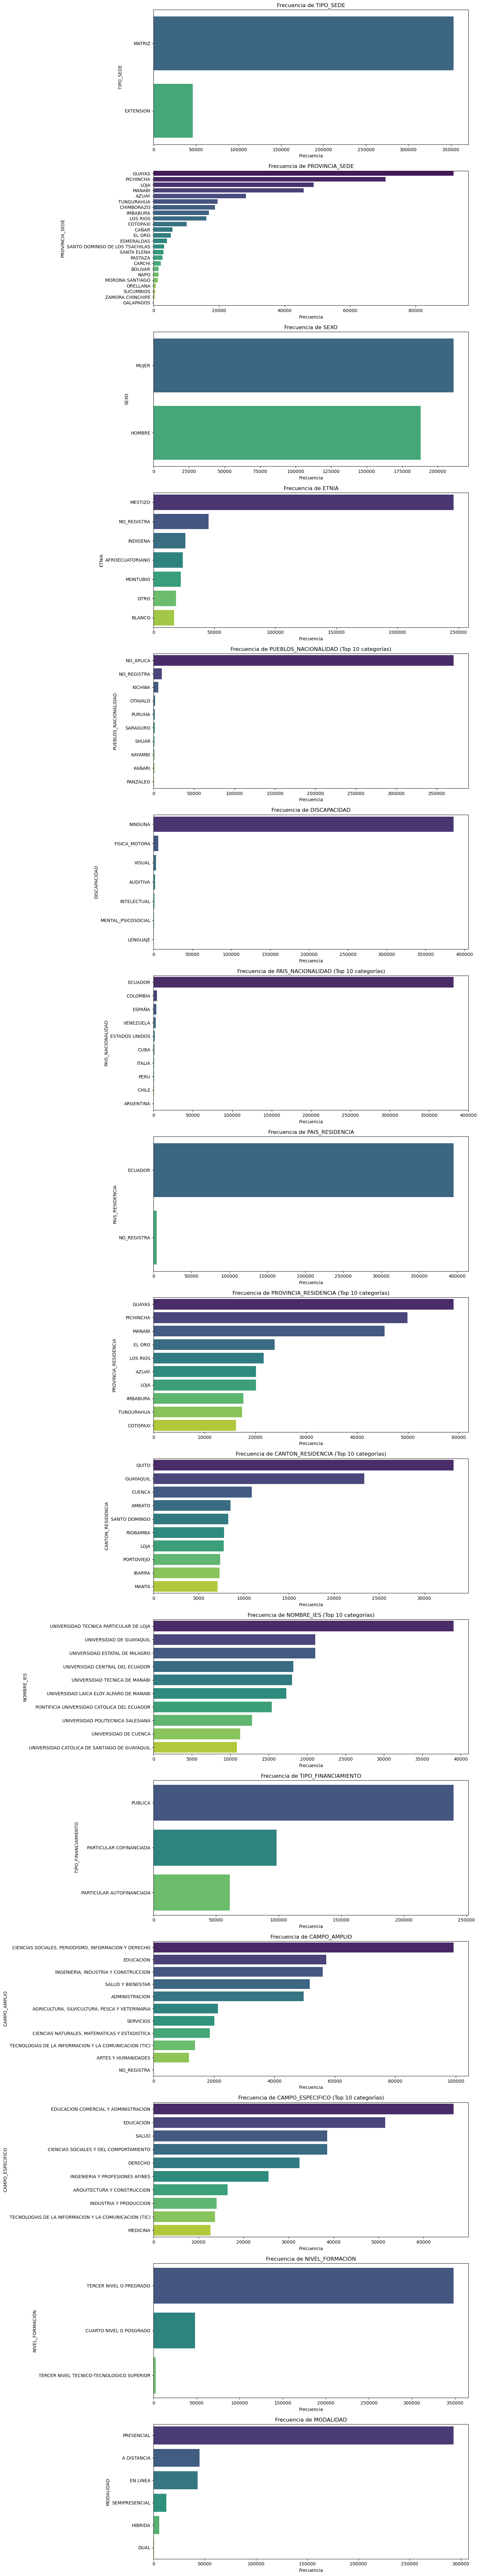


Estadísticas descriptivas de la variable 'tot':
count    399176.000000
mean          5.613040
std          25.112138
min           1.000000
25%           1.000000
50%           1.000000
75%           3.000000
max        1923.000000
Name: tot, dtype: float64


In [10]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Paso 1: Revisión de valores faltantes
print("Valores faltantes por columna:")
print(df_reduced.isnull().sum())

# Paso 2: Estadísticas descriptivas de las variables numéricas
print("\nEstadísticas descriptivas de las variables numéricas:")
print(df_reduced.describe())

# Paso 3: Visualización de variables categóricas (Top 10 si hay más de 25 categorías)
# Obtener las variables categóricas del dataset
categorical_columns = df_reduced.select_dtypes(include=['object']).columns

plt.figure(figsize=(15, 5 * len(categorical_columns)))

for i, column in enumerate(categorical_columns, 1):
    plt.subplot(len(categorical_columns), 1, i)
    
    # Contar las frecuencias de las categorías
    value_counts = df_reduced[column].value_counts()
    
    # Mostrar top 10 si hay más de 25 categorías
    if len(value_counts) > 25:
        value_counts = value_counts[:10]
        title_suffix = " (Top 10 categorías)"
    else:
        title_suffix = ""
    
    # Crear el gráfico de barras
    sns.countplot(y=df_reduced[column], order=value_counts.index, palette="viridis")
    plt.title(f'Frecuencia de {column}{title_suffix}')
    plt.xlabel('Frecuencia')
    plt.ylabel(column)
    plt.tight_layout()

plt.show()

# Paso 4: Estadísticas de la variable 'tot' (frecuencia de ocurrencias)
print("\nEstadísticas descriptivas de la variable 'tot':")
print(df_reduced['tot'].describe())


In [11]:
from sklearn.preprocessing import StandardScaler

# Paso 5: Normalización de las variables numéricas ('AÑO' y 'tot')
scaler = StandardScaler()
df_reduced[['AÑO_scaled', 'tot_scaled']] = scaler.fit_transform(df_reduced[['AÑO', 'tot']])

print("\nValores normalizados de 'AÑO' y 'tot':")
print(df_reduced[['AÑO', 'AÑO_scaled', 'tot', 'tot_scaled']].head())


Valores normalizados de 'AÑO' y 'tot':
    AÑO  AÑO_scaled  tot  tot_scaled
0  2020    -1.27974    1   -0.183698
1  2020    -1.27974   15    0.373802
2  2020    -1.27974    1   -0.183698
3  2020    -1.27974    1   -0.183698
4  2020    -1.27974   37    1.249874


C:\Users\luis.baca\AppData\Local\Temp\ipykernel_7952\2997397052.py:32: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "bo-" (-> color='b'). The keyword argument will take precedence.
  plt.plot(K, inertia, 'bo-', color='red')


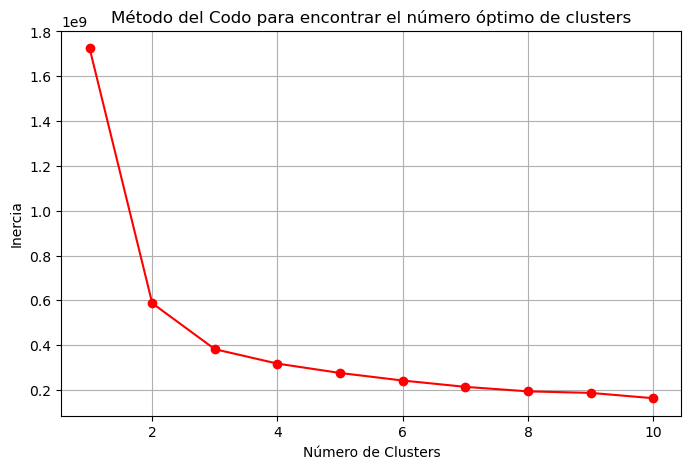

    AÑO  tot  cluster_kmeans
0  2020    1               1
1  2020   15               1
2  2020    1               2
3  2020    1               1
4  2020   37               1


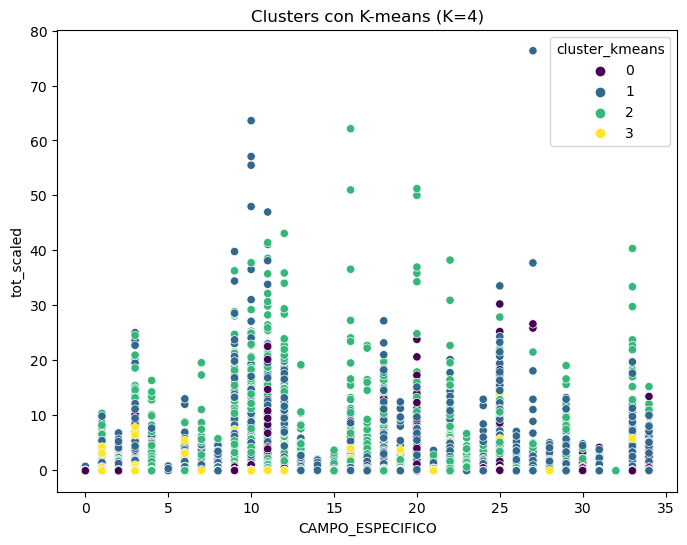

In [12]:
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns

# Paso 1: Codificar variables categóricas con LabelEncoder
categorical_columns = ['NOMBRE_IES', 'TIPO_SEDE', 'PROVINCIA_SEDE', 'SEXO', 'ETNIA',
                       'PUEBLOS_NACIONALIDAD', 'DISCAPACIDAD', 'PAIS_NACIONALIDAD',
                       'PAIS_RESIDENCIA', 'PROVINCIA_RESIDENCIA', 'CANTON_RESIDENCIA',
                       'TIPO_FINANCIAMIENTO', 'CAMPO_AMPLIO', 'CAMPO_ESPECIFICO',
                       'NIVEL_FORMACIÓN', 'MODALIDAD']

label_encoder = LabelEncoder()

# Aplicar LabelEncoder a cada columna categórica
for column in categorical_columns:
    df_reduced[column] = label_encoder.fit_transform(df_reduced[column])

# Paso 2: Preparar las variables numéricas (ya escaladas: AÑO_scaled y tot_scaled)
variables_para_clustering = ['AÑO_scaled', 'tot_scaled'] + categorical_columns

# Paso 3: Método del codo para determinar el número óptimo de clusters
inertia = []
K = range(1, 11)  # Probar con valores de K entre 1 y 10
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df_reduced[variables_para_clustering])
    inertia.append(kmeans.inertia_)

# Graficar el método del codo
plt.figure(figsize=(8, 5))
plt.plot(K, inertia, 'bo-', color='red')
plt.xlabel('Número de Clusters')
plt.ylabel('Inercia')
plt.title('Método del Codo para encontrar el número óptimo de clusters')
plt.grid(True)
plt.show()

# Paso 4: Aplicar K-means con el número de clusters que elijas (por ejemplo, 5)
n_clusters = 4  # Ajusta este valor según el gráfico del codo
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
df_reduced['cluster_kmeans'] = kmeans.fit_predict(df_reduced[variables_para_clustering])

# Ver la asignación de clusters
print(df_reduced[['AÑO', 'tot', 'cluster_kmeans']].head())

# Paso 5: Visualización opcional de los clusters (usando dos variables numéricas)
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df_reduced, x='CAMPO_ESPECIFICO', y='tot_scaled', hue='cluster_kmeans', palette="viridis")
plt.title(f'Clusters con K-means (K={n_clusters})')
plt.show()


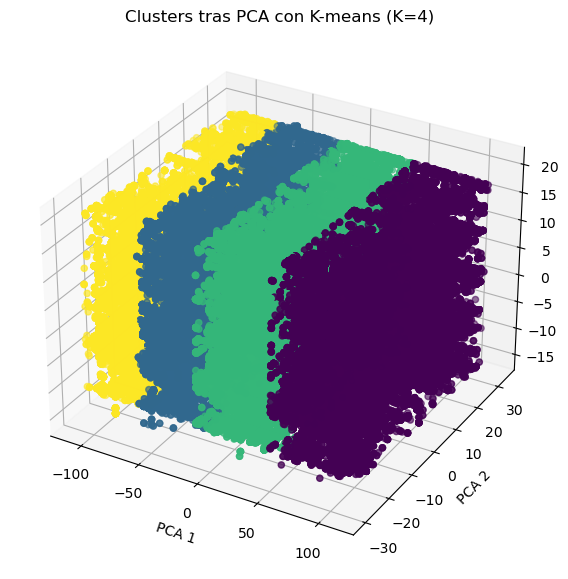

In [13]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Reducir a 3 componentes principales para visualización 3D

pca = PCA(n_components=3)
df_agregado_pca = pca.fit_transform(df_reduced[variables_para_clustering])

# Visualización de los clusters tras PCA
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df_agregado_pca[:, 0], df_agregado_pca[:, 1], df_agregado_pca[:, 2], 
           c=df_reduced['cluster_kmeans'], cmap='viridis')

ax.set_xlabel('PCA 1')
ax.set_ylabel('PCA 2')
ax.set_zlabel('PCA 3')
plt.title(f'Clusters tras PCA con K-means (K={n_clusters})')
plt.show()


In [14]:
#from sklearn.metrics import silhouette_score

# Calcular el puntaje de silueta
#silhouette_avg = silhouette_score(df_agregado_pca, df_reduced['cluster_kmeans'])
#print(f"Puntaje de silueta: {silhouette_avg}")


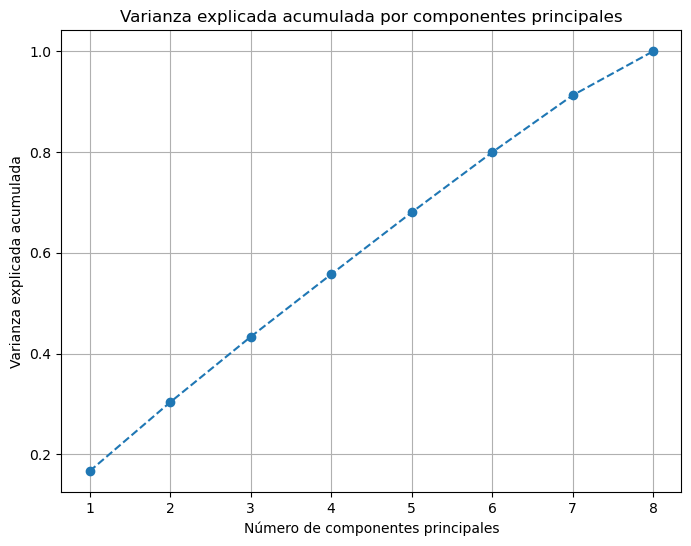

Cargas de las variables en los primeros componentes:


,tot_scaled,CAMPO_ESPECIFICO,TIPO_FINANCIAMIENTO,SEXO,PROVINCIA_SEDE,MODALIDAD,ETNIA,DISCAPACIDAD
0,0.056763,0.243179,0.644820,-0.057841,-0.411401,0.575117,-0.134401,0.020710
1,0.375800,0.291739,0.025929,0.080061,0.485489,0.302081,0.619494,0.236337
2,0.358230,-0.349416,0.136494,0.659392,-0.262199,-0.181859,-0.017571,0.440479
3,-0.028692,-0.349876,0.243897,0.300568,0.001459,0.029941,0.403654,-0.750401
4,0.699871,-0.426506,0.012985,-0.555462,-0.025922,0.003300,-0.096393,-0.097937
5,0.485853,0.597770,-0.225043,0.271629,-0.128715,-0.160472,-0.265886,-0.411311
6,0.014178,-0.217205,-0.011424,0.275203,0.594173,0.423459,-0.580382,-0.086899
7,0.018050,0.157586,0.674147,-0.083964,0.394991,-0.582184,-0.134488,0.016512


In [29]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns

# Selección de variables (ya seleccionadas previamente o tras un análisis de correlación)
variables_para_clustering = ['tot_scaled', 'CAMPO_ESPECIFICO', 'TIPO_FINANCIAMIENTO', 'SEXO', 'PROVINCIA_SEDE', 'MODALIDAD', 'ETNIA', 'DISCAPACIDAD']

# Escalar los datos
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_reduced[variables_para_clustering])

# Aplicar PCA
pca = PCA(n_components=len(variables_para_clustering))  # Número de componentes = número de variables
df_pca = pca.fit_transform(df_scaled)

# Varianza explicada por cada componente
explained_variance = pca.explained_variance_ratio_

# Gráfico de la varianza explicada acumulada
plt.figure(figsize=(8, 6))
plt.plot(range(1, len(variables_para_clustering) + 1), explained_variance.cumsum(), marker='o', linestyle='--')
plt.title('Varianza explicada acumulada por componentes principales')
plt.xlabel('Número de componentes principales')
plt.ylabel('Varianza explicada acumulada')
plt.grid(True)
plt.show()

# Mostrar las cargas de las variables en los componentes principales
pca_components = pd.DataFrame(pca.components_, columns=variables_para_clustering)
print("Cargas de las variables en los primeros componentes:")
pca_components


   TIPO_FINANCIAMIENTO  PROVINCIA_SEDE  cluster_hdbscan
0                    2              18               -1
1                    2              18               -1
2                    2              18               -1
3                    2              18               -1
4                    2              18               -1


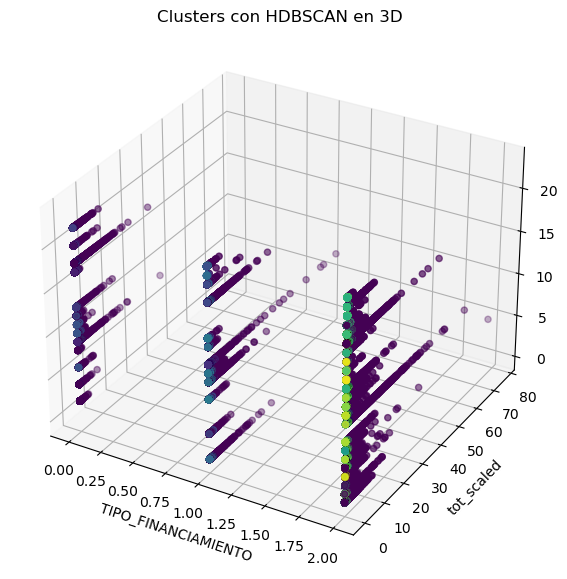

MemoryError: Unable to allocate 1023. MiB for an array with shape (336, 399176) and data type float64

In [60]:
import hdbscan
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score

# Paso 1: Seleccionar las variables clave basadas en tu análisis previo
variables_clave = ['tot_scaled', 'TIPO_FINANCIAMIENTO', 'MODALIDAD', 'PROVINCIA_SEDE', 'CAMPO_AMPLIO']

# Paso 2: Escalar las variables seleccionadas
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_reduced[variables_clave])

# Paso 3: Aplicar PCA (si es necesario)
pca = PCA(n_components=5)  # Probar con 5 componentes principales
df_pca = pca.fit_transform(df_scaled)

# Paso 4: Ajustar HDBSCAN con parámetros revisados
hdb = hdbscan.HDBSCAN(min_cluster_size=2000, min_samples=40, cluster_selection_epsilon=0.1)
df_reduced['cluster_hdbscan'] = hdb.fit_predict(df_pca)

# Paso 5: Verificar la asignación de clusters
print(df_reduced[['TIPO_FINANCIAMIENTO', 'PROVINCIA_SEDE', 'cluster_hdbscan']].head())

# Paso 6: Visualización de los clusters en 3D
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

# Usamos las variables más representativas para graficar
ax.scatter(df_reduced['TIPO_FINANCIAMIENTO'], df_reduced['tot_scaled'], df_reduced['PROVINCIA_SEDE'], 
           c=df_reduced['cluster_hdbscan'], cmap='viridis')

# Etiquetas y título
ax.set_xlabel('TIPO_FINANCIAMIENTO')
ax.set_ylabel('tot_scaled')
ax.set_zlabel('PROVINCIA_SEDE')
plt.title('Clusters con HDBSCAN en 3D')
plt.show()

# Paso 7: Cálculo del puntaje Silhouette
if len(set(df_reduced['cluster_hdbscan'])) > 1:
    silhouette_avg = silhouette_score(df_pca, df_reduced['cluster_hdbscan'])
    print(f"Puntaje de silueta con HDBSCAN: {silhouette_avg}")




In [59]:
df_reduced["cluster_hdbscan"].value_counts()

cluster_hdbscan
-1     53649
 9     19123
 47    11214
 78     8785
 65     8680
       ...  
 68     2159
 4      2139
 22     2139
 18     2060
 14     2049
Name: count, Length: 80, dtype: int64

In [52]:
clusters_profiles = df_reduced.groupby("cluster_hdbscan").mean()
clusters_profiles

,AÑO,TIPO_SEDE,PROVINCIA_SEDE,SEXO,ETNIA,PUEBLOS_NACIONALIDAD,DISCAPACIDAD,PAIS_NACIONALIDAD,PAIS_RESIDENCIA,PROVINCIA_RESIDENCIA,...,NOMBRE_IES,TIPO_FINANCIAMIENTO,CAMPO_AMPLIO,CAMPO_ESPECIFICO,NIVEL_FORMACIÓN,MODALIDAD,tot,AÑO_scaled,tot_scaled,cluster_kmeans
cluster_hdbscan,,,,,,,,,,,,,,,,,,,,,
-1,2021.069716,0.719986,11.392658,0.516716,3.111069,17.052681,4.953707,36.241855,0.005409,11.405732,...,30.872663,1.276479,4.639155,15.561177,0.854137,3.464077,49.522848,0.034565,1.748551,1.319322
0,2021.288973,1.000000,11.000000,0.577947,2.877060,17.288973,4.887199,36.169835,0.015209,12.262357,...,39.000000,2.000000,0.000000,12.000000,1.000000,0.000000,2.550063,0.303956,-0.121972,1.456274
1,2021.097143,1.000000,18.000000,0.622857,4.864286,17.000000,4.914286,36.097143,0.007143,13.511429,...,13.000000,2.000000,0.000000,12.000000,1.000000,0.000000,2.191429,0.068263,-0.136253,1.370000
2,2020.755444,1.000000,3.000000,0.512563,2.526801,17.722781,4.824121,36.056951,0.000000,15.327471,...,38.000000,2.000000,5.000000,11.000000,1.000000,0.000000,5.425461,-0.351565,-0.007470,1.558626
3,2021.720131,0.440262,11.206219,0.545008,2.970540,17.026187,4.970540,36.499182,0.000000,11.646481,...,10.947627,1.000000,4.436989,10.991817,0.222586,3.000000,2.034370,0.833697,-0.142508,1.425532
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
255,2021.120482,1.000000,17.000000,0.500000,2.575301,17.716867,4.810241,36.439759,0.000000,16.135542,...,26.000000,2.000000,6.000000,16.054217,0.951807,4.000000,1.831325,0.096939,-0.150593,1.421687
256,2021.012042,1.000000,18.000000,0.396435,3.950385,17.016378,4.967245,36.515173,0.015655,14.048651,...,12.060453,2.000000,6.000000,10.859345,0.959778,4.000000,2.895954,-0.036295,-0.108198,1.347543
257,2021.074899,0.795547,12.623482,0.412955,3.224696,17.000000,5.000000,36.000000,0.000000,12.657895,...,43.109312,2.000000,6.000000,13.746964,0.981781,4.000000,23.147773,0.040933,0.698258,1.293522


In [53]:
for cluster in df_reduced["cluster_hdbscan"].unique():
    print(f"Perfil del Cluster {cluster}:\n")
    print(df_reduced[df_reduced["cluster_hdbscan"] == cluster].describe(include="all"))
    print("\n" + "-"*50 + "\n")


Perfil del Cluster 249:

               AÑO  TIPO_SEDE  PROVINCIA_SEDE        SEXO       ETNIA  \
count   833.000000      833.0      833.000000  833.000000  833.000000   
mean   2021.004802        1.0       18.110444    0.536615    4.259304   
std       0.820399        0.0        0.313631    0.498957    2.239825   
min    2020.000000        1.0       18.000000    0.000000    0.000000   
25%    2020.000000        1.0       18.000000    0.000000    3.000000   
50%    2021.000000        1.0       18.000000    1.000000    6.000000   
75%    2022.000000        1.0       18.000000    1.000000    6.000000   
max    2022.000000        1.0       19.000000    1.000000    6.000000   

       PUEBLOS_NACIONALIDAD  DISCAPACIDAD  PAIS_NACIONALIDAD  PAIS_RESIDENCIA  \
count            833.000000    833.000000         833.000000       833.000000   
mean              16.900360      4.923169          36.423770         0.001200   
std                1.045095      0.549347           5.894445         0.034